In [1]:
import pandas as pd
import math

In [2]:
data = pd.read_csv('tabla_combinada.csv', encoding='latin-1', sep=',')

In [3]:
df = pd.DataFrame(data)

In [4]:
data

,estacion,Datetime,DV,HR,P,PB,RS,RU,TEMP,VV,...,NMHC,NO,NO2,NOX,O3,PM10,PM25,SO2,TCH,TOL
0,4,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,...,NaN,105.0,71.0,232.0,NaN,NaN,NaN,18.0,NaN,NaN
1,4,2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,163.0,84.0,334.0,NaN,NaN,NaN,20.0,NaN,NaN
2,4,2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,4.3,NaN,...,NaN,125.0,77.0,269.0,NaN,NaN,NaN,18.0,NaN,NaN
3,4,2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,4.1,NaN,...,NaN,142.0,86.0,304.0,NaN,NaN,NaN,19.0,NaN,NaN
4,4,2019-01-05,NaN,NaN,NaN,NaN,NaN,NaN,3.6,NaN,...,NaN,108.0,75.0,241.0,NaN,NaN,NaN,18.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21182,59,2023-07-27,0.0,40.0,0.0,937.0,334.0,0.0,26.6,1.46,...,0.0,2.0,22.0,25.0,100.0,NaN,NaN,NaN,0.0,NaN
21183,59,2023-07-28,8.0,38.0,0.0,937.0,331.0,0.0,27.3,1.38,...,0.0,4.0,21.0,28.0,100.0,NaN,NaN,NaN,0.0,NaN
21184,59,2023-07-29,12.0,38.0,0.0,937.0,335.0,0.0,27.7,1.23,...,0.0,1.0,19.0,21.0,75.0,NaN,NaN,NaN,0.0,NaN
21185,59,2023-07-30,1.0,40.0,0.0,939.0,333.0,0.0,29.1,1.12,...,0.0,2.0,17.0,20.0,78.0,NaN,NaN,NaN,0.0,NaN


In [5]:
nan_count = df.isnull().sum().sum()
print(nan_count)

208664


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21187 entries, 0 to 21186
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   estacion  21187 non-null  int64  
 1   Datetime  21187 non-null  object 
 2   DV        6493 non-null   float64
 3   HR        18136 non-null  float64
 4   P         8152 non-null   float64
 5   PB        4858 non-null   float64
 6   RS        4933 non-null   float64
 7   RU        16921 non-null  float64
 8   TEMP      18951 non-null  float64
 9   VV        6520 non-null   float64
 10  BEN       6447 non-null   float64
 11  CH4       13294 non-null  float64
 12  CO        10233 non-null  float64
 13  EBE       6385 non-null   float64
 14  NMHC      13294 non-null  float64
 15  NO        21110 non-null  float64
 16  NO2       21110 non-null  float64
 17  NOX       21110 non-null  float64
 18  O3        15404 non-null  float64
 19  PM10      9610 non-null   float64
 20  PM25      6426 non-null   fl

In [5]:
df.describe()

,estacion,DV,HR,P,PB,RS,RU,TEMP,VV,BEN,...,NMHC,NO,NO2,NOX,O3,PM10,PM25,SO2,TCH,TOL
count,21187.000000,6493.000000,18136.000000,8152.000000,4858.000000,4933.000000,16921.000000,18951.000000,6520.000000,6447.000000,...,13294.000000,21110.000000,21110.000000,21110.000000,15404.000000,9610.000000,6426.000000,8338.000000,13294.000000,6431.000000
mean,34.755463,98.428769,56.689843,0.918885,944.964389,201.490168,0.389161,16.262947,1.348681,0.351823,...,0.011178,11.757224,28.888205,46.907011,52.558565,18.557648,9.761905,6.063325,0.151604,1.633525
std,18.151083,98.491209,18.774465,3.226149,6.722274,101.523691,2.987349,7.846315,0.653209,0.292532,...,0.037123,18.691801,17.592303,44.143814,23.171959,13.927262,6.128935,3.886827,0.442661,1.531241
min,4.000000,0.000000,16.000000,0.000000,917.000000,13.000000,0.000000,-6.100000,0.130000,0.000000,...,0.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.100000
25%,18.000000,8.000000,41.000000,0.000000,940.000000,110.000000,0.000000,10.000000,0.910000,0.200000,...,0.000000,2.000000,16.000000,20.000000,35.000000,10.000000,6.000000,3.000000,0.000000,0.700000
50%,36.000000,64.000000,56.000000,0.000000,945.000000,197.000000,0.000000,15.200000,1.190000,0.300000,...,0.000000,5.000000,25.000000,33.000000,54.000000,16.000000,9.000000,5.000000,0.000000,1.200000
75%,54.000000,197.000000,71.000000,0.000000,949.000000,297.000000,0.000000,22.600000,1.600000,0.500000,...,0.000000,12.000000,38.000000,57.000000,70.562500,23.000000,12.000000,8.000000,0.000000,2.100000
max,59.000000,359.000000,100.000000,43.800000,965.000000,411.000000,50.000000,34.800000,6.040000,3.400000,...,0.430000,231.000000,148.000000,501.000000,120.000000,432.000000,83.000000,33.000000,2.590000,35.300000


HISTOGRAMAS ANTES DE IMPUTAR

In [8]:
import matplotlib.pyplot as plt

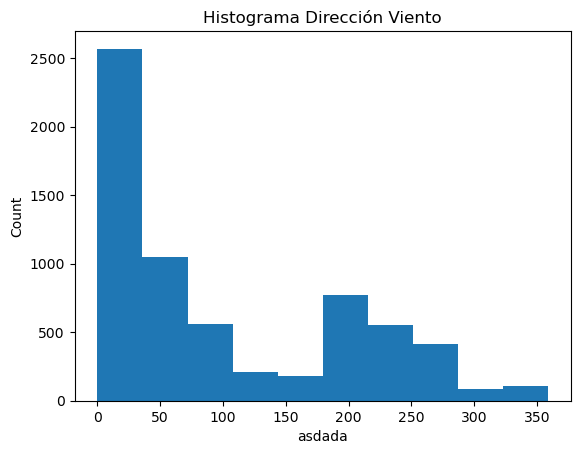

In [9]:
plt.hist(df.DV, bins=10)
plt.title("Histograma Dirección Viento")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

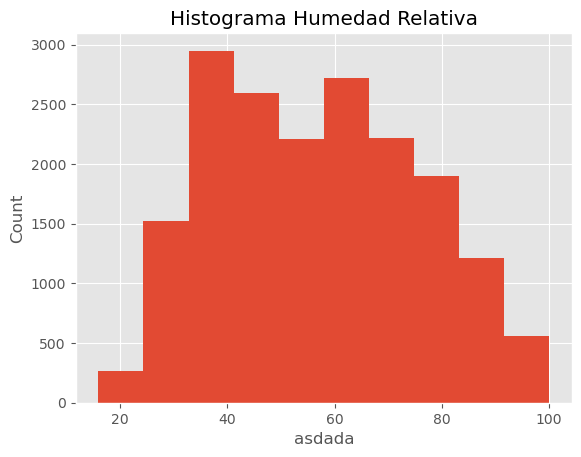

In [11]:
plt.hist(df.HR, bins=10)
plt.title("Histograma Humedad Relativa")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

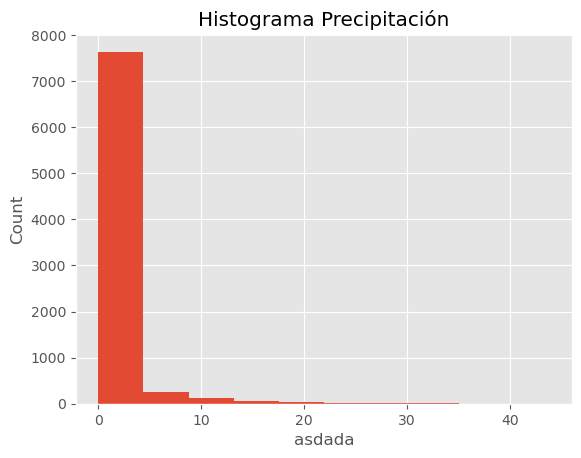

In [13]:
plt.hist(df.P, bins=10)
plt.title("Histograma Precipitación")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

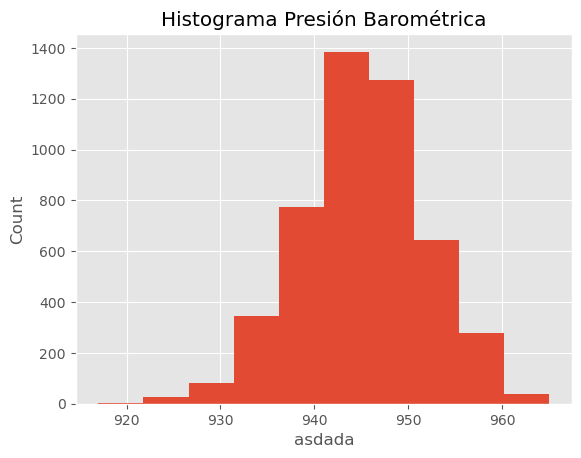

In [15]:
plt.hist(df.PB, bins=10)
plt.title("Histograma Presión Barométrica")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

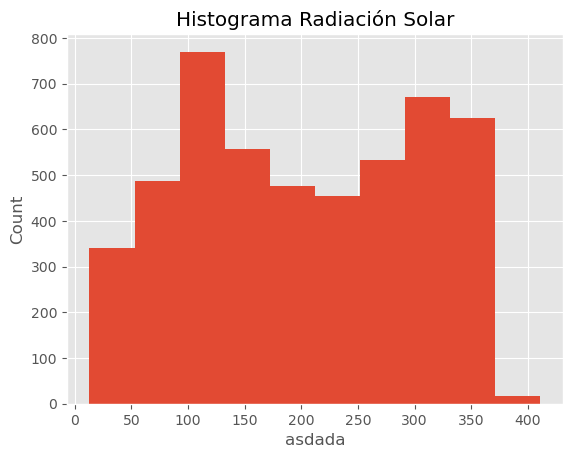

In [17]:
plt.hist(df.RS, bins=10)
plt.title("Histograma Radiación Solar")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

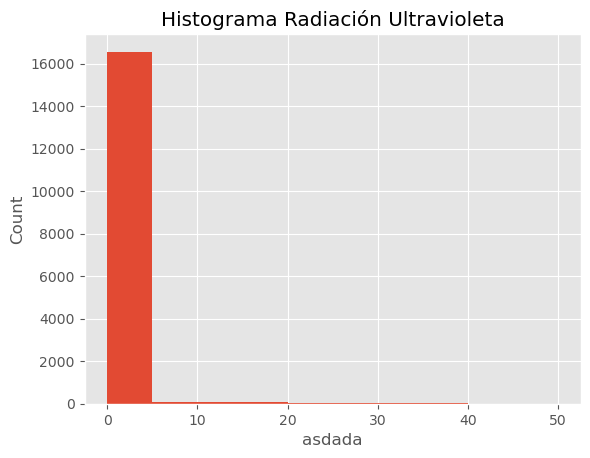

In [19]:
plt.hist(df.RU, bins=10)
plt.title("Histograma Radiación Ultravioleta")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

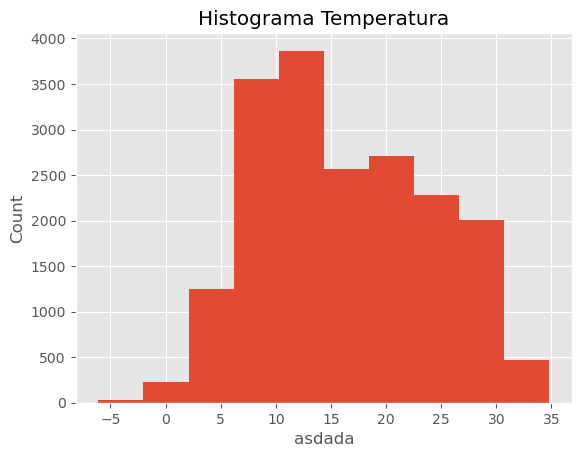

In [20]:
plt.hist(df.TEMP, bins=10)
plt.title("Histograma Temperatura")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

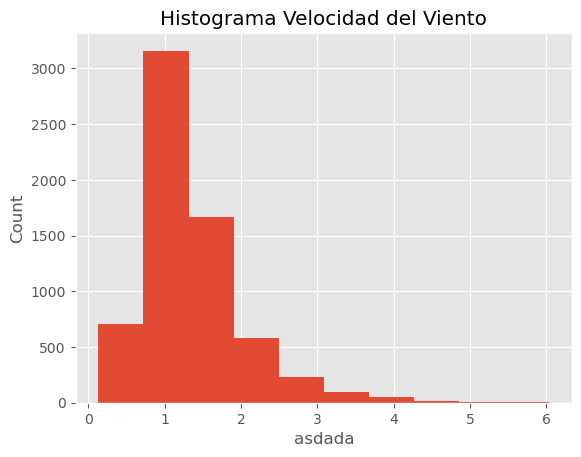

In [21]:
plt.hist(df.VV, bins=10)
plt.title("Histograma Velocidad del Viento")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

- calidad del aire

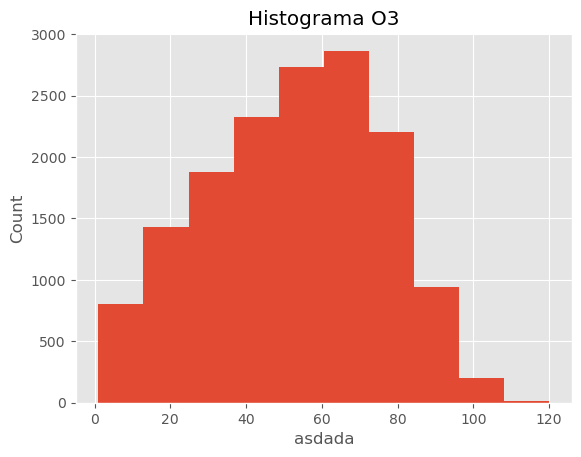

In [10]:
plt.hist(df.O3, bins=10)
plt.title("Histograma O3")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

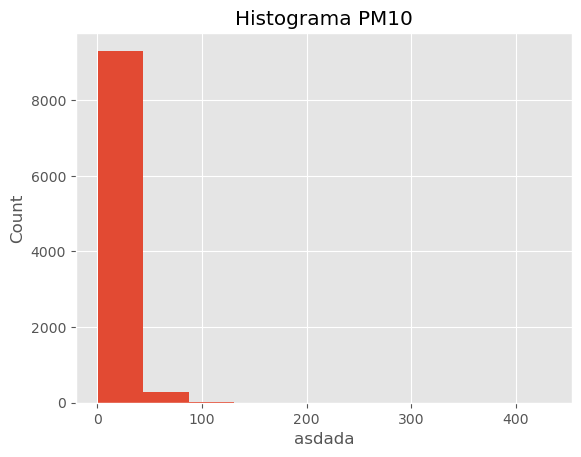

In [12]:
plt.hist(df.PM10, bins=10)
plt.title("Histograma PM10")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

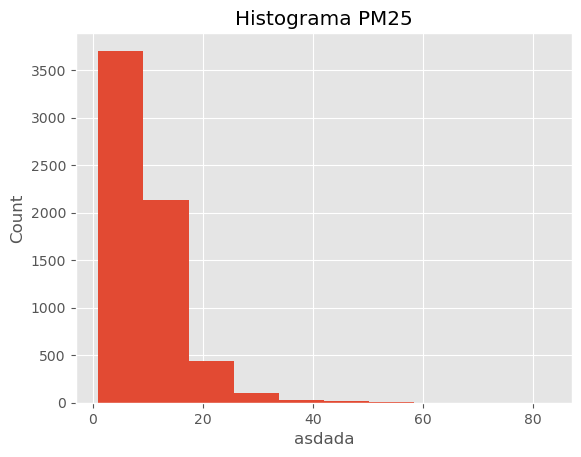

In [14]:
plt.hist(df.PM25, bins=10)
plt.title("Histograma PM25")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

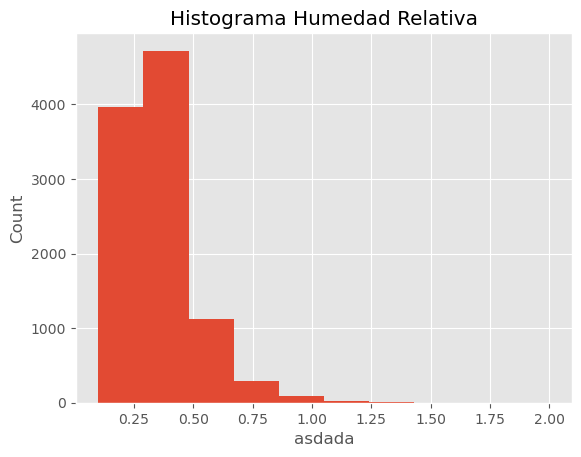

In [15]:
plt.hist(df.CO, bins=10)
plt.title("Histograma Humedad Relativa")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

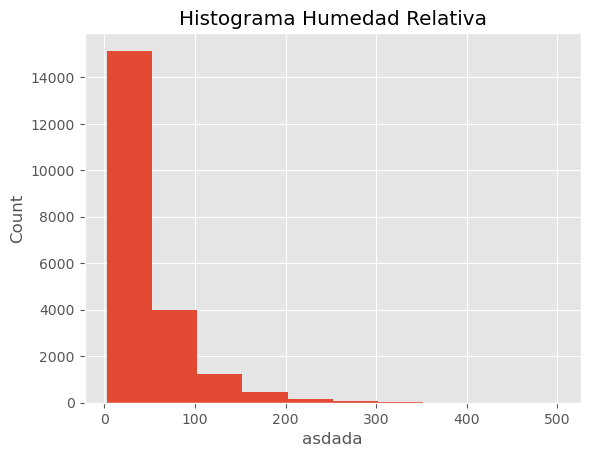

In [16]:
plt.hist(df.NOX, bins=10)
plt.title("Histograma Humedad Relativa")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

## OUTLIERS

In [5]:
import seaborn as sns

<AxesSubplot:xlabel='DV'>

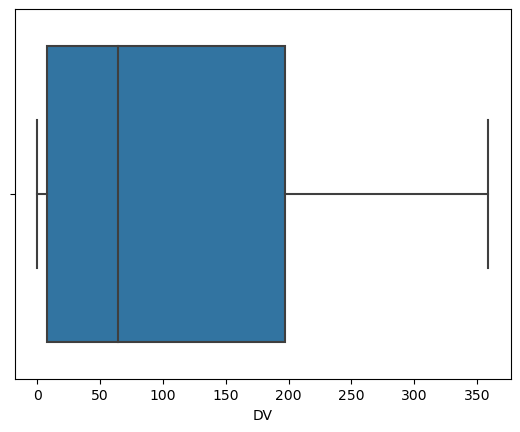

In [6]:
sns.boxplot(x=df.DV)

<AxesSubplot:xlabel='HR'>

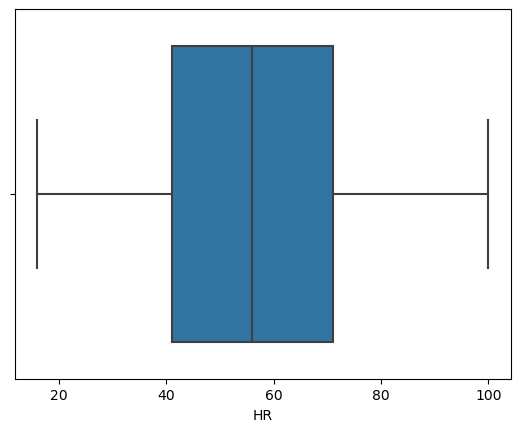

In [7]:
sns.boxplot(x=df.HR)

<AxesSubplot:xlabel='P'>

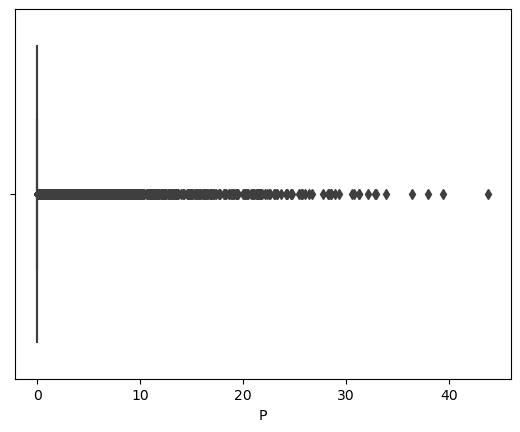

In [8]:
sns.boxplot(x=df.P)

<AxesSubplot:xlabel='PB'>

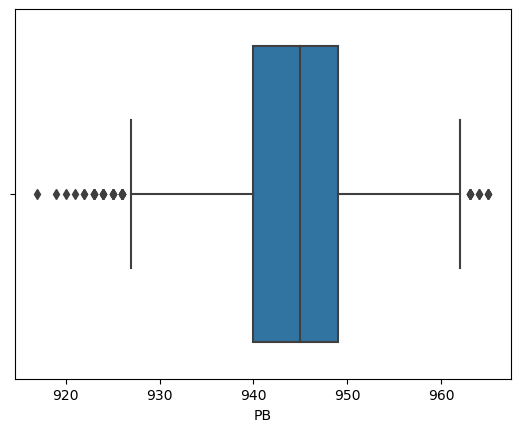

In [9]:
sns.boxplot(x=df.PB)

<AxesSubplot:xlabel='RS'>

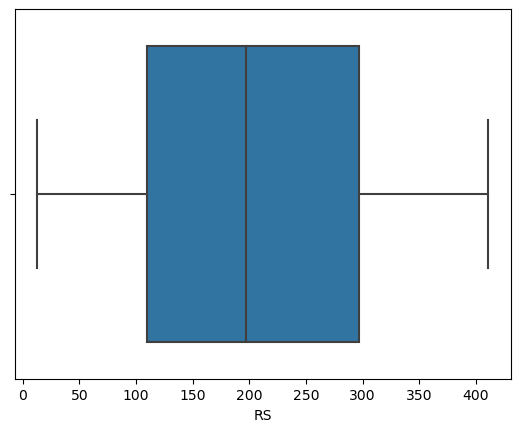

In [10]:
sns.boxplot(x=df.RS)

<AxesSubplot:xlabel='RU'>

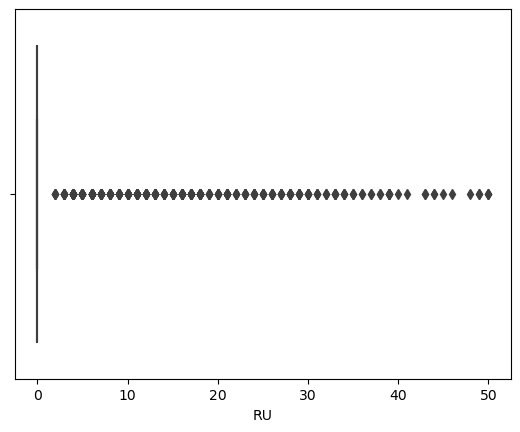

In [14]:
sns.boxplot(x=df.RU)

<AxesSubplot:xlabel='VV'>

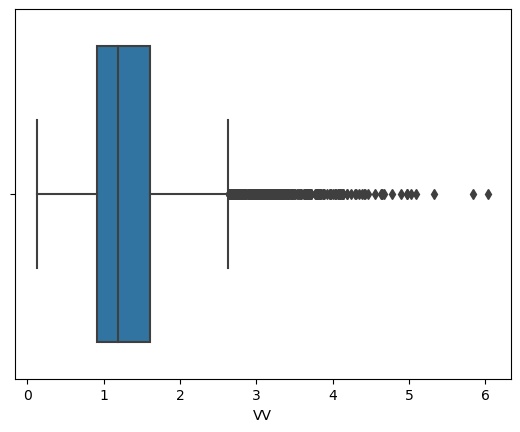

In [15]:
sns.boxplot(x=df.VV)

<AxesSubplot:xlabel='TEMP'>

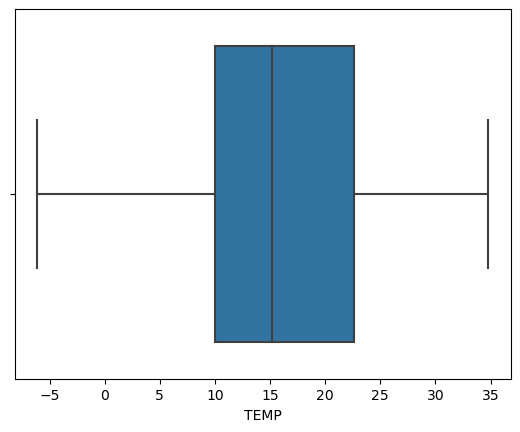

In [16]:
sns.boxplot(x=df.TEMP)

## IMPUTACIÓN VALORES 'NAN'

In [6]:
def fill_na(row, col):
    if math.isnan(row[col]):
        value = df[df['Datetime'] == row['Datetime']][col].mean()
    else:
        value = row[col]
    return value

In [7]:
col_to_fill = 'DV'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [8]:
col_to_fill = 'HR'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [9]:
col_to_fill = 'P'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [10]:
col_to_fill = 'PB'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [11]:
col_to_fill = 'RS'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [12]:
col_to_fill = 'RU'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [13]:
col_to_fill = 'TEMP'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [14]:
col_to_fill = 'VV'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [15]:
col_to_fill = 'BEN'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [16]:
col_to_fill = 'EBE'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [17]:
col_to_fill = 'NMHC'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [18]:
col_to_fill = 'NO'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [19]:
col_to_fill = 'NO2'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [20]:
col_to_fill = 'NOX'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [21]:
col_to_fill = 'O3'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [22]:
col_to_fill = 'PM10'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [23]:
col_to_fill = 'PM25'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [24]:
col_to_fill = 'SO2'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [25]:
col_to_fill = 'TCH'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [26]:
col_to_fill = 'TOL'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [27]:
col_to_fill = 'CO'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [28]:
col_to_fill = 'CH4'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [29]:
df.describe()

,estacion,DV,HR,P,PB,RS,RU,TEMP,VV,BEN,...,NMHC,NO,NO2,NOX,O3,PM10,PM25,SO2,TCH,TOL
count,21187.000000,21187.000000,21187.00000,21187.000000,21187.000000,21187.000000,18307.000000,21187.000000,21187.000000,21187.000000,...,21187.000000,21187.000000,21187.000000,21187.000000,21187.000000,21187.000000,21187.000000,21187.000000,21187.000000,21187.000000
mean,34.755463,99.496897,56.51347,0.932221,944.935196,202.836417,1.554633,16.215445,1.351665,0.353018,...,0.045705,11.750233,28.888158,46.896168,52.758002,18.747336,9.852854,5.545123,0.620543,1.641856
std,18.151083,85.401593,18.72845,3.174759,5.895263,101.512191,5.739964,7.819105,0.597078,0.261544,...,0.060462,18.665905,17.579328,44.091985,22.891531,13.295410,5.816517,3.210400,0.706456,1.334360
min,4.000000,0.000000,16.00000,0.000000,917.000000,13.000000,0.000000,-6.100000,0.130000,0.000000,...,0.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.100000
25%,18.000000,26.000000,41.00000,0.000000,941.333333,110.666667,0.000000,9.972727,0.940000,0.200000,...,0.000000,2.000000,16.000000,20.000000,35.727778,11.000000,6.000000,3.000000,0.000000,0.775000
50%,36.000000,67.750000,55.00000,0.000000,944.666667,199.333333,0.000000,15.000000,1.237500,0.275000,...,0.000000,5.000000,25.000000,33.000000,54.757778,16.166667,8.750000,5.000000,0.000000,1.225000
75%,54.000000,175.250000,71.00000,0.040000,948.666667,298.333333,0.000000,22.500000,1.610000,0.425000,...,0.090000,12.000000,38.000000,57.000000,70.847143,23.333333,12.500000,7.285714,1.385000,2.075000
max,59.000000,359.000000,100.00000,43.800000,965.000000,411.000000,50.000000,34.800000,6.040000,3.400000,...,0.430000,231.000000,148.000000,501.000000,120.000000,432.000000,83.000000,33.000000,2.590000,35.300000


In [ ]:
df1_pivot.to_csv("2019_METEO_pivot.csv")

In [22]:
df.columns

Index(['estacion', 'Datetime', 'DV', 'HR', 'P', 'PB', 'RS', 'RU', 'TEMP', 'VV',
       'BEN', 'CH4', 'CO', 'EBE', 'NMHC', 'NO', 'NO2', 'NOX', 'O3', 'PM10',
       'PM25', 'SO2', 'TCH', 'TOL'],
      dtype='object')

## CAJAS BIGOTES

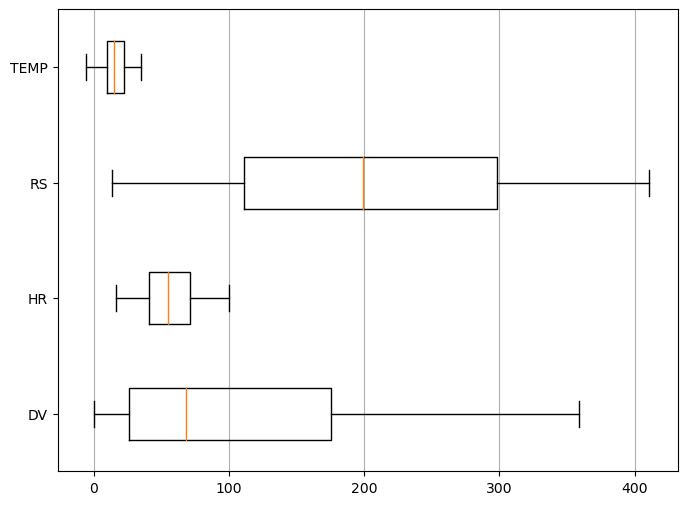

In [64]:
# Crear un gráfico de bigotes con Matplotlib para múltiples variables
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico según tus preferencias

# Lista de variables que deseas trazar (por ejemplo, DV, HR y TEMP)
variables = [df.DV, df.HR, df.RS, df.TEMP]

# Etiquetas para las variables (opcional)
etiquetas = ['DV', 'HR', 'RS', 'TEMP']

# Crear el gráfico de bigotes para cada variable
plt.boxplot(variables, vert=False, labels=etiquetas)

# Mostrar el gráfico
plt.grid(axis='x')  # Agregar una cuadrícula horizontal
plt.savefig('BIGOTES_NO.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

- VV

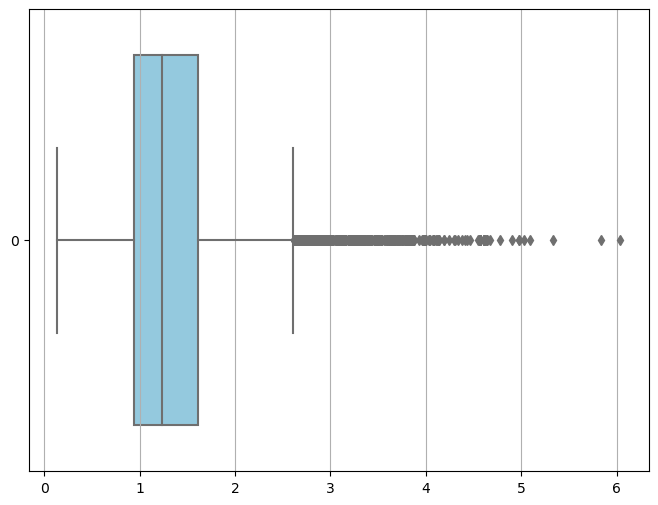

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de bigotes con Seaborn y especificar el color
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico según tus preferencias
sns.boxplot(data=df.VV, orient='h', color='skyblue')  # Especifica el color aquí


# Mostrar el gráfico
plt.grid(axis='x')  # Agregar una cuadrícula horizontal
plt.savefig('BIGOTES_VV.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [79]:
Q1 = df.quantile(0.25)
print(Q1)

estacion     18.000000
DV           26.000000
HR           41.000000
P             0.000000
PB          941.333333
RS          110.666667
RU            0.000000
TEMP          9.972727
VV            0.940000
BEN           0.200000
CH4           0.000000
CO            0.200000
EBE           0.100000
NMHC          0.000000
NO            2.000000
NO2          16.000000
NOX          20.000000
O3           35.727778
PM10         11.000000
PM25          6.000000
SO2           3.000000
TCH           0.000000
TOL           0.775000
Name: 0.25, dtype: float64


In [80]:
Q3 = df.quantile(0.75)
print(Q3)

estacion     54.000000
DV          175.250000
HR           71.000000
P             0.040000
PB          948.666667
RS          298.333333
RU            0.000000
TEMP         22.500000
VV            1.610000
BEN           0.425000
CH4           0.000000
CO            0.400000
EBE           0.400000
NMHC          0.090000
NO           12.000000
NO2          38.000000
NOX          57.000000
O3           70.847143
PM10         23.333333
PM25         12.500000
SO2           7.285714
TCH           1.385000
TOL           2.075000
Name: 0.75, dtype: float64


In [67]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

estacion     36.000000
DV          149.250000
HR           30.000000
P             0.040000
PB            7.333333
RS          187.666667
RU            0.000000
TEMP         12.527273
VV            0.670000
BEN           0.225000
CH4           0.000000
CO            0.200000
EBE           0.300000
NMHC          0.090000
NO           10.000000
NO2          22.000000
NOX          37.000000
O3           35.119365
PM10         12.333333
PM25          6.500000
SO2           4.285714
TCH           1.385000
TOL           1.300000
dtype: float64


In [68]:
df.loc[(df.VV>(Q3.VV + 1.5 * IQR.VV))]

,estacion,Datetime,DV,HR,P,PB,RS,RU,TEMP,VV,...,NMHC,NO,NO2,NOX,O3,PM10,PM25,SO2,TCH,TOL
22,4,2019-01-23,265.50,62.727273,0.00,935.000000,124.333333,5.666667,10.1,3.9925,...,0.065,9.000000,26.000000,40.000000,63.0,6.166667,3.00,16.00,1.445,0.850000
27,4,2019-01-28,266.00,54.000000,0.00,943.000000,133.666667,7.000000,9.3,2.6825,...,0.070,7.000000,25.000000,36.000000,61.1,8.000000,3.50,15.00,1.465,1.150000
30,4,2019-01-31,229.75,89.818182,1.52,929.000000,81.666667,5.666667,10.1,3.8500,...,0.045,6.000000,18.000000,28.000000,50.6,5.333333,3.75,14.00,1.395,0.833333
31,4,2019-02-01,243.50,82.909091,7.30,921.000000,95.666667,4.666667,7.0,3.6550,...,0.060,5.000000,18.000000,26.000000,65.2,5.666667,3.25,13.00,1.385,0.300000
32,4,2019-02-02,276.00,55.454545,0.02,935.000000,124.333333,6.000000,5.4,2.7950,...,0.075,6.000000,26.000000,36.000000,67.3,6.000000,3.25,13.00,1.425,0.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20783,58,2023-01-16,216.75,80.000000,0.10,941.333333,42.666667,0.000000,6.6,2.8975,...,0.000,2.000000,6.000000,8.000000,66.0,6.833333,2.75,2.00,0.000,0.450000
20784,58,2023-01-17,237.25,73.000000,0.42,930.000000,91.000000,0.000000,7.8,3.4675,...,0.000,2.000000,5.000000,7.000000,79.0,5.500000,2.25,2.25,0.000,0.450000
20993,59,2023-01-16,235.00,80.000000,0.00,935.000000,46.000000,0.000000,6.7,3.0000,...,0.000,3.000000,11.000000,16.000000,61.0,6.833333,2.75,2.00,0.000,0.450000
20994,59,2023-01-17,224.00,74.000000,0.40,924.000000,107.000000,0.000000,8.0,3.4100,...,0.000,3.000000,8.000000,13.000000,73.0,5.500000,2.25,2.25,0.000,0.450000


- P

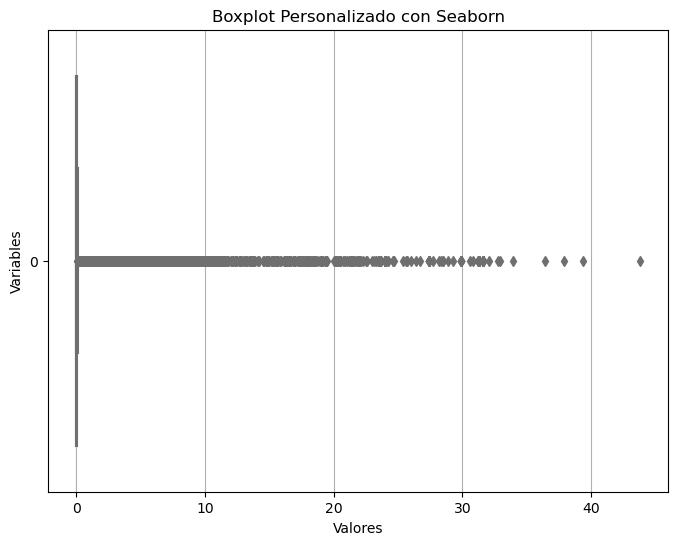

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de bigotes con Seaborn y especificar el color
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico según tus preferencias
sns.boxplot(data=df.P, orient='h', color='skyblue')  # Especifica el color aquí

# Personalizar el gráfico
plt.title('Boxplot Personalizado con Seaborn')
plt.xlabel('Valores')
plt.ylabel('Variables')

# Mostrar el gráfico
plt.grid(axis='x')  # Agregar una cuadrícula horizontal
plt.show()

In [70]:
df.loc[(df.P>(Q3.P + 1.5 * IQR.P))]

,estacion,Datetime,DV,HR,P,PB,RS,RU,TEMP,VV,...,NMHC,NO,NO2,NOX,O3,PM10,PM25,SO2,TCH,TOL
18,4,2019-01-19,185.000000,89.272727,4.04,941.0,44.000000,2.333333,1.6,0.797500,...,0.110,44.0,52.0,119.0,12.777778,23.666667,19.250000,12.000000,1.765,3.225000
19,4,2019-01-20,202.000000,74.636364,1.52,939.0,106.333333,5.666667,6.5,1.257500,...,0.075,25.0,43.0,81.0,32.333333,10.000000,9.250000,14.000000,1.540,1.175000
29,4,2019-01-30,254.250000,61.727273,3.26,937.0,124.333333,7.000000,7.4,2.522500,...,0.065,9.0,29.0,43.0,61.800000,8.000000,4.750000,14.000000,1.460,0.900000
30,4,2019-01-31,229.750000,89.818182,1.52,929.0,81.666667,5.666667,10.1,3.850000,...,0.045,6.0,18.0,28.0,50.600000,5.333333,3.750000,14.000000,1.395,0.833333
31,4,2019-02-01,243.500000,82.909091,7.30,921.0,95.666667,4.666667,7.0,3.655000,...,0.060,5.0,18.0,26.0,65.200000,5.666667,3.250000,13.000000,1.385,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21133,59,2023-06-08,130.000000,87.000000,8.85,934.0,108.000000,0.000000,17.8,1.246667,...,0.000,2.0,14.0,18.0,45.000000,16.000000,10.000000,1.000000,0.000,1.050000
21138,59,2023-06-13,34.000000,64.000000,1.45,933.0,258.000000,0.000000,20.0,1.293333,...,0.000,2.0,12.0,15.0,87.000000,11.500000,5.666667,1.333333,0.000,0.833333
21143,59,2023-06-18,144.333333,58.000000,1.00,934.0,277.000000,0.000000,24.2,1.293333,...,0.000,1.0,9.0,11.0,85.000000,16.833333,11.250000,1.666667,0.000,0.575000
21144,59,2023-06-19,53.666667,70.000000,4.10,933.0,248.000000,0.000000,22.5,1.183333,...,0.000,2.0,19.0,22.0,69.000000,19.400000,16.750000,1.333333,0.000,1.100000


- PB

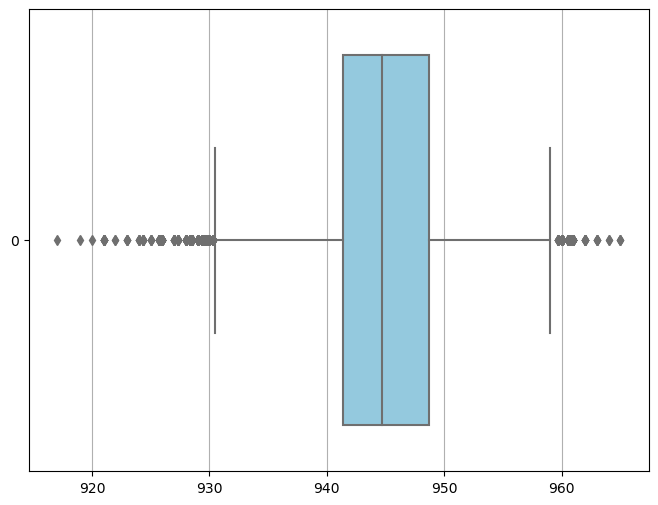

In [77]:
# Crear un gráfico de bigotes con Seaborn y especificar el color
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico según tus preferencias
sns.boxplot(data=df.PB, orient='h', color='skyblue')  # Especifica el color aquí


# Mostrar el gráfico
plt.grid(axis='x')  # Agregar una cuadrícula horizontal
plt.savefig('BIGOTES_PB.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [72]:
df.loc[(df.PB<(Q1.PB - 1.5 * IQR.PB))]

,estacion,Datetime,DV,HR,P,PB,RS,RU,TEMP,VV,...,NMHC,NO,NO2,NOX,O3,PM10,PM25,SO2,TCH,TOL
30,4,2019-01-31,229.75,89.818182,1.52,929.000000,81.666667,5.666667,10.1,3.8500,...,0.045,6.000000,18.000000,28.000000,50.6,5.333333,3.75,14.00,1.395,0.833333
31,4,2019-02-01,243.50,82.909091,7.30,921.000000,95.666667,4.666667,7.0,3.6550,...,0.060,5.000000,18.000000,26.000000,65.2,5.666667,3.25,13.00,1.385,0.300000
93,4,2019-04-04,266.50,35.363636,0.00,930.333333,272.333333,23.333333,9.4,1.6125,...,0.080,10.000000,33.000000,48.000000,72.6,11.666667,5.25,3.00,1.395,1.050000
94,4,2019-04-05,225.00,78.090909,4.98,927.333333,99.333333,6.333333,6.8,2.2650,...,0.065,7.000000,31.000000,41.000000,64.5,8.833333,4.50,2.00,1.375,1.000000
95,4,2019-04-06,234.00,77.090909,1.70,930.333333,178.666667,12.666667,6.6,2.7350,...,0.055,5.000000,20.000000,27.000000,69.1,5.833333,3.75,2.00,1.370,0.425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20784,58,2023-01-17,237.25,73.000000,0.42,930.000000,91.000000,0.000000,7.8,3.4675,...,0.000,2.000000,5.000000,7.000000,79.0,5.500000,2.25,2.25,0.000,0.450000
20994,59,2023-01-17,224.00,74.000000,0.40,924.000000,107.000000,0.000000,8.0,3.4100,...,0.000,3.000000,8.000000,13.000000,73.0,5.500000,2.25,2.25,0.000,0.450000
21031,59,2023-02-25,4.00,68.000000,0.10,928.000000,150.000000,0.000000,3.3,0.8100,...,0.000,9.818182,36.727273,52.000000,42.0,18.666667,11.75,2.00,0.000,1.600000
21032,59,2023-02-26,23.00,66.000000,0.00,929.000000,178.000000,0.000000,4.1,1.6200,...,0.000,6.636364,29.545455,39.454545,53.0,16.333333,11.00,2.00,0.000,0.975000


In [73]:
df.loc[(df.PB>(Q3.PB + 1.5 * IQR.PB))]

,estacion,Datetime,DV,HR,P,PB,RS,RU,TEMP,VV,...,NMHC,NO,NO2,NOX,O3,PM10,PM25,SO2,TCH,TOL
3613,56,2019-01-05,67.00,62.0,0.0,961.000000,108.333333,4.666667,4.8,0.710000,...,0.185,139.0,92.0,305.0,5.000000,44.000000,29.00,14.428571,1.770,4.475000
3969,56,2019-12-31,67.00,77.0,0.0,960.000000,97.333333,NaN,6.5,0.710000,...,0.135,136.0,75.0,283.0,6.000000,37.000000,31.00,10.571429,1.715,4.900000
6072,24,2020-02-02,249.00,93.0,0.0,960.000000,31.000000,0.000000,11.2,0.630000,...,0.020,2.0,17.0,20.0,21.000000,9.000000,7.00,5.000000,1.200,0.600000
6093,24,2020-02-23,241.00,52.0,0.0,960.000000,183.000000,0.000000,11.3,0.860000,...,0.040,5.0,36.0,44.0,33.000000,15.000000,9.00,5.000000,1.250,1.600000
6361,24,2020-11-19,0.00,77.0,0.0,960.000000,108.000000,0.000000,12.6,0.700000,...,0.160,14.0,19.0,41.0,18.000000,20.000000,11.00,2.000000,1.260,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20597,56,2023-02-11,64.00,62.0,0.0,960.000000,160.666667,0.000000,6.1,1.320000,...,0.000,10.0,37.0,52.0,54.555556,14.000000,8.00,2.500000,0.000,0.850000
20599,56,2023-02-13,63.00,70.0,0.0,960.000000,160.333333,0.000000,6.8,1.140000,...,0.000,20.0,45.0,76.0,44.222222,28.000000,12.00,3.000000,0.000,1.066667
20771,58,2023-01-04,24.50,83.0,0.0,960.000000,102.333333,0.000000,4.2,0.602500,...,0.000,10.0,20.0,34.0,16.000000,20.400000,9.75,3.000000,0.000,2.925000
20808,58,2023-02-10,41.25,72.0,0.0,960.666667,136.000000,0.000000,3.6,0.900000,...,0.000,5.0,22.0,30.0,35.000000,16.666667,9.00,2.750000,0.000,1.800000


- RU

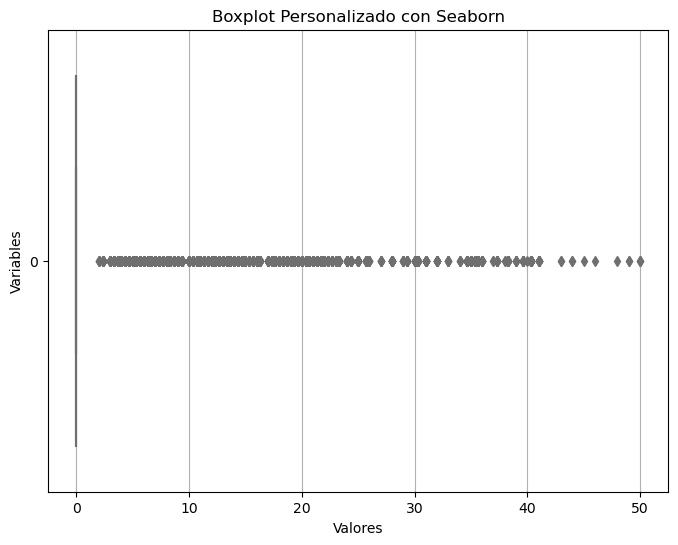

In [74]:
# Crear un gráfico de bigotes con Seaborn y especificar el color
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico según tus preferencias
sns.boxplot(data=df.RU, orient='h', color='skyblue')  # Especifica el color aquí

# Personalizar el gráfico
plt.title('Boxplot Personalizado con Seaborn')
plt.xlabel('Valores')
plt.ylabel('Variables')

# Mostrar el gráfico
plt.grid(axis='x')  # Agregar una cuadrícula horizontal
plt.show()

In [75]:
df.loc[(df.RU>(Q3.RU + 1.5 * IQR.RU))]

,estacion,Datetime,DV,HR,P,PB,RS,RU,TEMP,VV,...,NMHC,NO,NO2,NOX,O3,PM10,PM25,SO2,TCH,TOL
0,4,2019-01-01,55.50,56.636364,0.0,956.000000,104.333333,4.666667,4.5,0.6375,...,0.130,105.0,71.0,232.0,13.0,32.600000,24.00,18.000000,1.665,2.650
1,4,2019-01-02,190.00,60.727273,0.0,954.000000,105.000000,4.666667,4.0,0.6450,...,0.160,163.0,84.0,334.0,8.5,35.000000,22.25,20.000000,1.695,4.625
2,4,2019-01-03,75.00,51.090909,0.0,953.000000,108.000000,4.666667,4.3,0.7125,...,0.120,125.0,77.0,269.0,17.5,25.666667,14.25,18.000000,1.595,3.800
3,4,2019-01-04,177.25,59.090909,0.0,955.000000,106.333333,4.333333,4.1,0.6325,...,0.165,142.0,86.0,304.0,8.5,38.500000,21.75,19.000000,1.665,5.200
4,4,2019-01-05,115.75,58.909091,0.0,957.666667,108.333333,4.666667,3.6,0.6600,...,0.185,108.0,75.0,241.0,8.2,34.400000,24.25,18.000000,1.770,4.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4469,59,2019-05-15,352.00,29.000000,0.0,935.000000,339.000000,32.000000,22.7,0.9400,...,0.105,6.0,25.0,34.0,76.0,24.666667,11.50,7.428571,1.485,2.625
4470,59,2019-05-16,90.00,38.000000,0.0,931.000000,332.000000,31.000000,20.4,1.9100,...,0.060,4.0,24.0,30.0,74.0,25.666667,11.25,7.285714,1.475,1.375
4471,59,2019-05-17,276.00,50.000000,0.1,932.000000,209.000000,18.000000,13.0,2.5400,...,0.050,1.0,8.0,10.0,88.0,7.833333,3.75,6.857143,1.390,0.750
4472,59,2019-05-18,148.00,40.000000,0.0,933.000000,273.000000,21.000000,13.3,1.1400,...,0.050,1.0,5.0,7.0,81.0,5.500000,3.00,6.714286,1.380,0.425


## BIGOTES CALIDAD AIRE

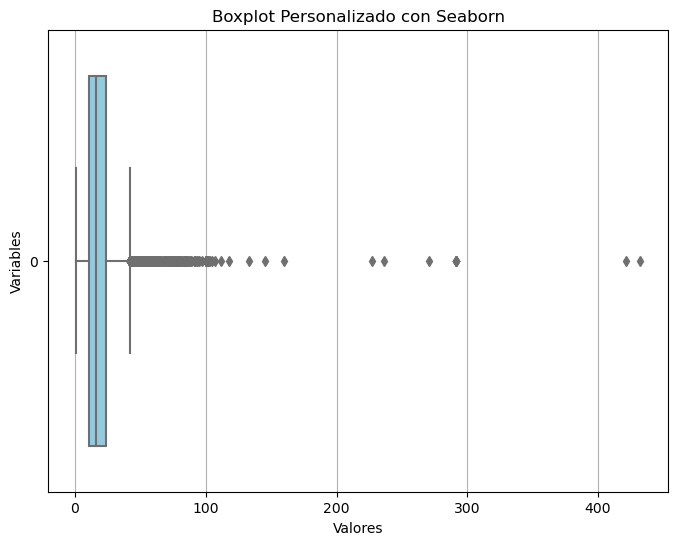

In [110]:
# Crear un gráfico de bigotes con Seaborn y especificar el color
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico según tus preferencias
sns.boxplot(data=df.PM10, orient='h', color='skyblue')  # Especifica el color aquí

# Personalizar el gráfico
plt.title('Boxplot Personalizado con Seaborn')
plt.xlabel('Valores')
plt.ylabel('Variables')

# Mostrar el gráfico
plt.grid(axis='x')  # Agregar una cuadrícula horizontal
plt.show()

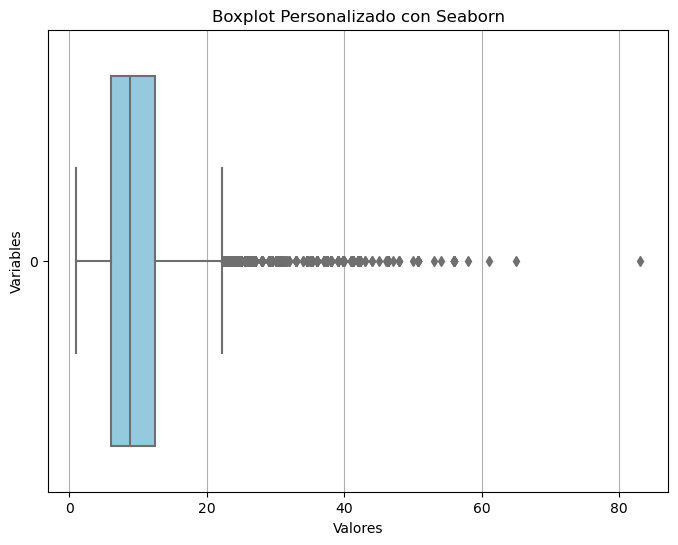

In [82]:
# Crear un gráfico de bigotes con Seaborn y especificar el color
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico según tus preferencias
sns.boxplot(data=df.PM25, orient='h', color='skyblue')  # Especifica el color aquí

# Personalizar el gráfico
plt.title('Boxplot Personalizado con Seaborn')
plt.xlabel('Valores')
plt.ylabel('Variables')

# Mostrar el gráfico
plt.grid(axis='x')  # Agregar una cuadrícula horizontal
plt.show()

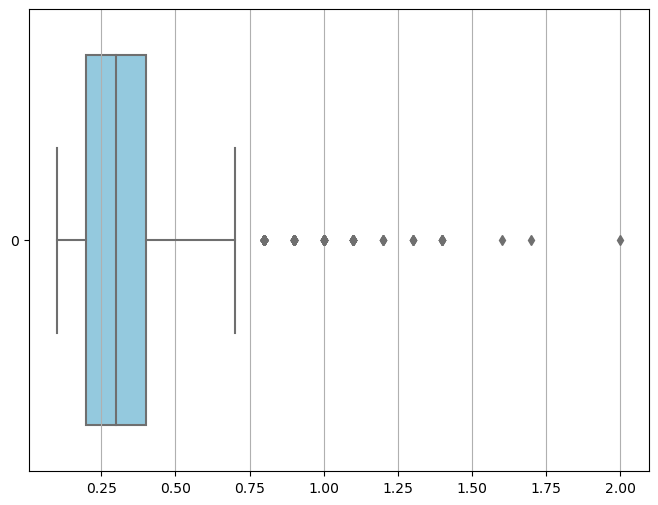

In [113]:
# Crear un gráfico de bigotes con Seaborn y especificar el color
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico según tus preferencias
sns.boxplot(data=df.CO, orient='h', color='skyblue')  # Especifica el color aquí


# Mostrar el gráfico
plt.grid(axis='x')  # Agregar una cuadrícula horizontal
plt.savefig('BIGOTES_CO.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [122]:
df.loc[(df.CO>(Q3.CO + 1.5 * IQR.CO))]

,estacion,Datetime,DV,HR,P,PB,RS,RU,TEMP,VV,...,NMHC,NO,NO2,NOX,O3,PM10,PM25,SO2,TCH,TOL
0,4,2019-01-01,55.50,56.636364,0.0,956.000000,104.333333,4.666667,4.5,0.6375,...,0.130,105.0,71.0,232.0,13.000000,32.600000,24.00,18.000000,1.665,2.650
1,4,2019-01-02,190.00,60.727273,0.0,954.000000,105.000000,4.666667,4.0,0.6450,...,0.160,163.0,84.0,334.0,8.500000,35.000000,22.25,20.000000,1.695,4.625
2,4,2019-01-03,75.00,51.090909,0.0,953.000000,108.000000,4.666667,4.3,0.7125,...,0.120,125.0,77.0,269.0,17.500000,25.666667,14.25,18.000000,1.595,3.800
3,4,2019-01-04,177.25,59.090909,0.0,955.000000,106.333333,4.333333,4.1,0.6325,...,0.165,142.0,86.0,304.0,8.500000,38.500000,21.75,19.000000,1.665,5.200
4,4,2019-01-05,115.75,58.909091,0.0,957.666667,108.333333,4.666667,3.6,0.6600,...,0.185,108.0,75.0,241.0,8.200000,34.400000,24.25,18.000000,1.770,4.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15780,35,2022-08-19,29.75,37.000000,0.0,948.666667,313.000000,0.000000,24.6,1.1425,...,0.000,4.0,26.0,32.0,77.650000,11.166667,5.75,3.000000,0.000,0.775
15781,35,2022-08-20,65.25,30.000000,0.0,947.666667,305.666667,0.000000,27.9,1.0200,...,0.000,4.0,25.0,31.0,75.320000,16.666667,8.00,4.000000,0.000,0.925
15782,35,2022-08-21,83.25,25.000000,0.0,945.333333,296.666667,0.000000,29.7,1.0825,...,0.000,5.0,36.0,44.0,62.510000,17.500000,10.25,4.000000,0.000,1.225
15783,35,2022-08-22,35.75,33.000000,0.0,944.333333,296.000000,0.000000,29.4,1.1500,...,0.000,5.0,23.0,31.0,53.730000,16.000000,8.75,2.333333,0.000,0.925


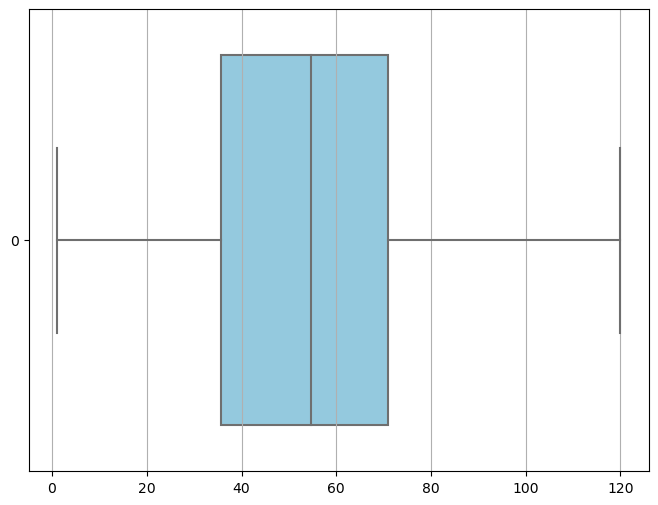

In [102]:
# Crear un gráfico de bigotes con Seaborn y especificar el color
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico según tus preferencias
sns.boxplot(data=df.O3, orient='h', color='skyblue')  # Especifica el color aquí

# Mostrar el gráfico
plt.grid(axis='x')  # Agregar una cuadrícula horizontal
plt.savefig('BIGOTES_O3.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

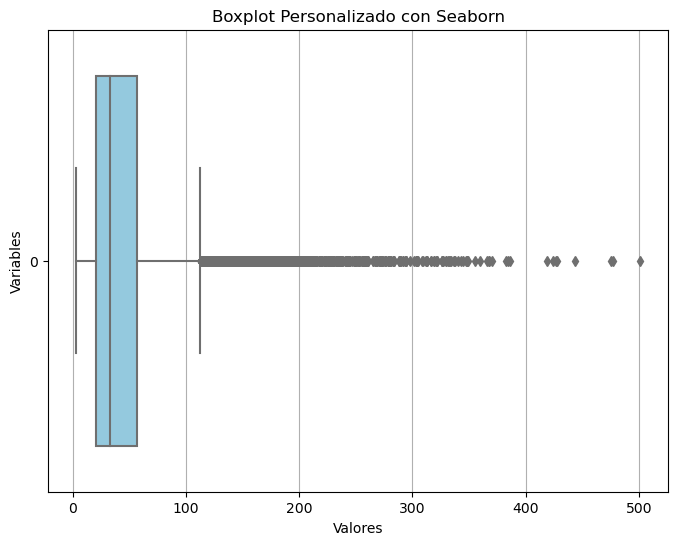

In [85]:
# Crear un gráfico de bigotes con Seaborn y especificar el color
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico según tus preferencias
sns.boxplot(data=df.NOX, orient='h', color='skyblue')  # Especifica el color aquí

# Personalizar el gráfico
plt.title('Boxplot Personalizado con Seaborn')
plt.xlabel('Valores')
plt.ylabel('Variables')

# Mostrar el gráfico
plt.grid(axis='x')  # Agregar una cuadrícula horizontal
plt.show()

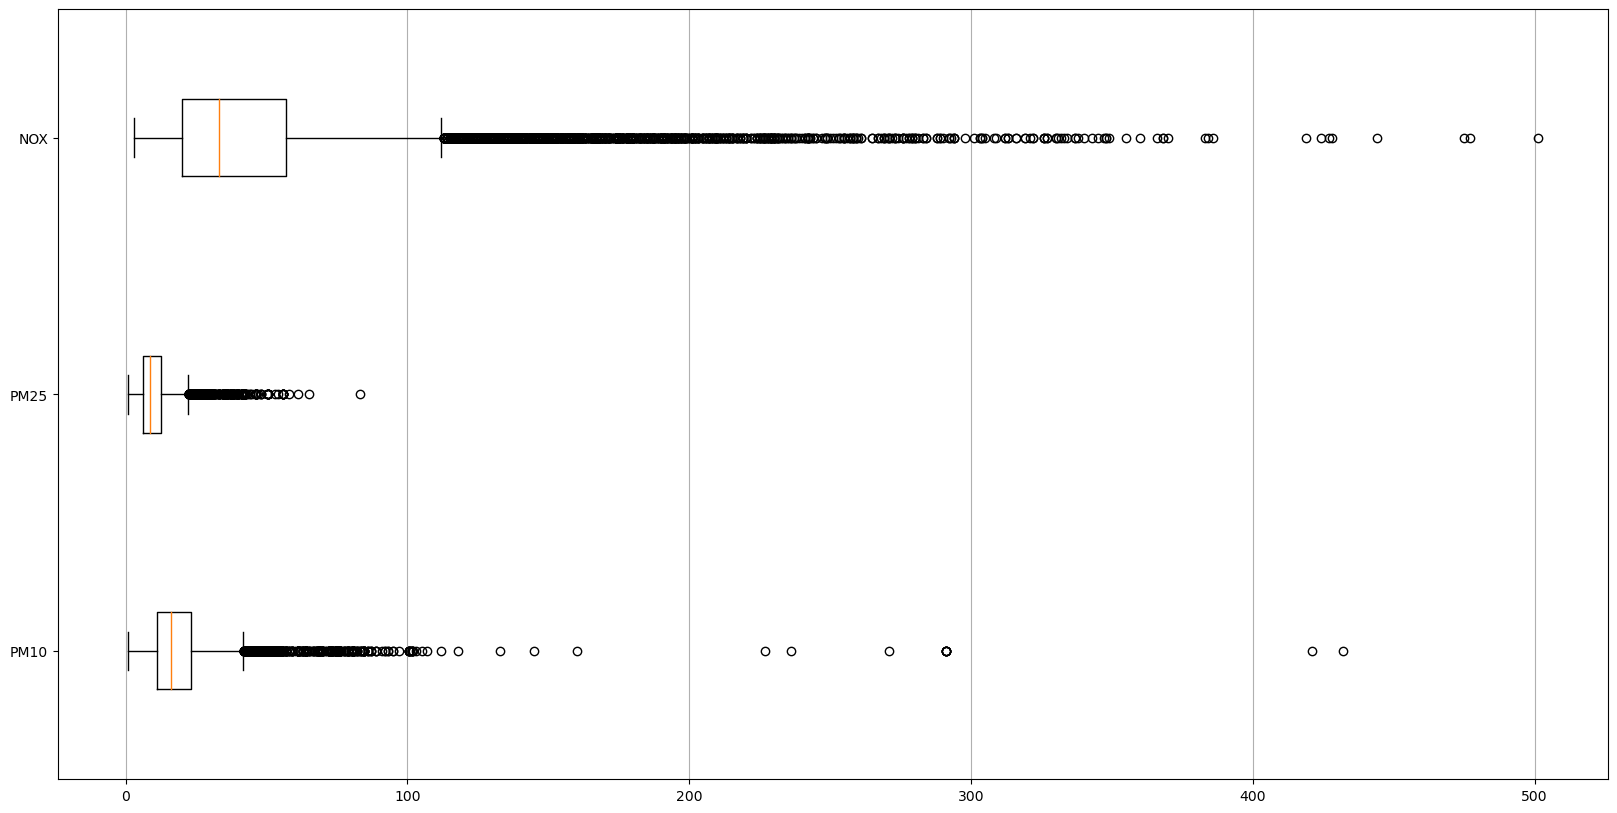

In [111]:
# Crear un gráfico de bigotes con Matplotlib para múltiples variables
plt.figure(figsize=(20, 10))  # Ajusta el tamaño del gráfico según tus preferencias

# Lista de variables que deseas trazar (por ejemplo, DV, HR y TEMP)
variables = [df.PM10, df.PM25, df.NOX]

# Etiquetas para las variables (opcional)
etiquetas = ['PM10', 'PM25', 'NOX']

# Crear el gráfico de bigotes para cada variable
plt.boxplot(variables, vert=False, labels=etiquetas)

# Mostrar el gráfico
plt.grid(axis='x')  # Agregar una cuadrícula horizontal
plt.savefig('BIGOTES_NOX_PM25_PM10.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [123]:
df.loc[(df.NOX>(Q3.NOX + 1.5 * IQR.NOX))]

,estacion,Datetime,DV,HR,P,PB,RS,RU,TEMP,VV,...,NMHC,NO,NO2,NOX,O3,PM10,PM25,SO2,TCH,TOL
0,4,2019-01-01,55.50,56.636364,0.0,956.000000,104.333333,4.666667,4.5,0.6375,...,0.130,105.0,71.0,232.0,13.000000,32.600000,24.00,18.0,1.665,2.650000
1,4,2019-01-02,190.00,60.727273,0.0,954.000000,105.000000,4.666667,4.0,0.6450,...,0.160,163.0,84.0,334.0,8.500000,35.000000,22.25,20.0,1.695,4.625000
2,4,2019-01-03,75.00,51.090909,0.0,953.000000,108.000000,4.666667,4.3,0.7125,...,0.120,125.0,77.0,269.0,17.500000,25.666667,14.25,18.0,1.595,3.800000
3,4,2019-01-04,177.25,59.090909,0.0,955.000000,106.333333,4.333333,4.1,0.6325,...,0.165,142.0,86.0,304.0,8.500000,38.500000,21.75,19.0,1.665,5.200000
4,4,2019-01-05,115.75,58.909091,0.0,957.666667,108.333333,4.666667,3.6,0.6600,...,0.185,108.0,75.0,241.0,8.200000,34.400000,24.25,18.0,1.770,4.475000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20589,56,2023-02-03,14.00,59.000000,0.0,959.000000,145.666667,0.000000,7.5,0.7300,...,0.000,74.0,77.0,191.0,20.777778,36.000000,20.00,7.5,0.000,7.200000
20590,56,2023-02-04,75.00,56.000000,0.0,959.000000,150.333333,0.000000,8.2,0.7200,...,0.000,53.0,74.0,155.0,22.333333,31.000000,18.00,6.5,0.000,5.175000
20602,56,2023-02-16,70.00,60.000000,0.0,957.000000,169.666667,0.000000,9.0,0.8800,...,0.000,40.0,62.0,123.0,37.000000,30.000000,18.00,4.0,0.000,2.925000
20603,56,2023-02-17,64.00,52.000000,0.0,959.000000,174.333333,0.000000,9.1,0.9800,...,0.000,58.0,72.0,162.0,45.111111,35.000000,20.00,4.0,0.000,2.066667


In [124]:
df.loc[(df.PM25>(Q3.PM25 + 1.5 * IQR.PM25))]

,estacion,Datetime,DV,HR,P,PB,RS,RU,TEMP,VV,...,NMHC,NO,NO2,NOX,O3,PM10,PM25,SO2,TCH,TOL
0,4,2019-01-01,55.50,56.636364,0.0,956.000000,104.333333,4.666667,4.5,0.637500,...,0.130,105.0,71.0,232.0,13.0,32.600000,24.00,18.000000,1.665,2.650000
4,4,2019-01-05,115.75,58.909091,0.0,957.666667,108.333333,4.666667,3.6,0.660000,...,0.185,108.0,75.0,241.0,8.2,34.400000,24.25,18.000000,1.770,4.475000
5,4,2019-01-06,158.25,54.545455,0.0,955.000000,109.666667,4.666667,3.7,0.655000,...,0.205,129.0,82.0,279.0,11.2,33.666667,26.00,18.000000,1.820,4.725000
13,4,2019-01-14,134.50,65.545455,0.0,949.000000,109.666667,5.666667,5.1,0.685000,...,0.265,210.0,105.0,427.0,5.2,61.333333,39.75,22.000000,2.120,7.250000
15,4,2019-01-16,154.50,72.454545,0.0,944.000000,110.333333,5.333333,4.0,0.987500,...,0.130,77.0,61.0,179.0,16.7,34.800000,23.75,16.000000,1.635,3.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20969,58,2023-07-23,139.00,33.000000,0.0,942.000000,338.333333,0.000000,25.3,1.386667,...,0.000,1.0,9.0,11.0,104.0,33.166667,22.75,1.750000,0.000,1.633333
20991,59,2023-01-14,159.00,87.000000,0.0,948.000000,107.000000,0.000000,5.9,0.570000,...,0.000,23.0,40.0,75.0,12.0,37.333333,26.75,3.250000,0.000,3.900000
21028,59,2023-02-22,3.00,67.000000,0.0,938.000000,168.000000,0.000000,10.4,0.680000,...,0.000,11.0,42.0,60.0,33.0,75.000000,35.25,3.333333,0.000,2.275000
21075,59,2023-04-10,199.00,40.000000,0.0,943.000000,251.000000,0.000000,19.0,0.940000,...,0.000,19.0,40.0,69.0,56.0,72.000000,23.75,2.500000,0.000,1.633333


In [125]:
df.loc[(df.PM10>(Q3.PM10 + 1.5 * IQR.PM10))]

,estacion,Datetime,DV,HR,P,PB,RS,RU,TEMP,VV,...,NMHC,NO,NO2,NOX,O3,PM10,PM25,SO2,TCH,TOL
13,4,2019-01-14,134.50,65.545455,0.0,949.000000,109.666667,5.666667,5.1,0.6850,...,0.265,210.0,105.0,427.0,5.2,61.333333,39.75,22.000000,2.120,7.250000
16,4,2019-01-17,193.50,81.636364,0.0,944.000000,45.000000,2.333333,4.5,0.6725,...,0.115,68.0,63.0,167.0,10.9,43.333333,35.25,15.000000,1.715,2.875000
49,4,2019-02-19,133.75,60.454545,0.0,946.000000,164.666667,7.333333,8.7,0.8025,...,0.095,59.0,67.0,158.0,29.0,42.166667,17.00,18.000000,1.505,2.600000
50,4,2019-02-20,67.75,62.727273,0.0,949.000000,161.333333,9.333333,8.3,0.7950,...,0.110,62.0,63.0,158.0,23.6,50.500000,21.25,18.000000,1.590,3.550000
51,4,2019-02-21,93.25,56.000000,0.0,953.333333,175.333333,10.333333,9.2,0.8225,...,0.110,83.0,68.0,194.0,27.3,51.666667,20.75,17.000000,1.535,4.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21027,59,2023-02-21,5.00,56.000000,0.0,941.000000,132.000000,0.000000,11.5,0.7600,...,0.000,5.0,32.0,40.0,44.0,44.333333,17.75,3.500000,0.000,2.500000
21028,59,2023-02-22,3.00,67.000000,0.0,938.000000,168.000000,0.000000,10.4,0.6800,...,0.000,11.0,42.0,60.0,33.0,75.000000,35.25,3.333333,0.000,2.275000
21075,59,2023-04-10,199.00,40.000000,0.0,943.000000,251.000000,0.000000,19.0,0.9400,...,0.000,19.0,40.0,69.0,56.0,72.000000,23.75,2.500000,0.000,1.633333
21173,59,2023-07-18,206.00,38.000000,0.0,940.000000,306.000000,0.000000,31.5,1.6100,...,0.000,4.0,28.0,35.0,77.0,46.833333,18.50,2.000000,0.000,2.233333


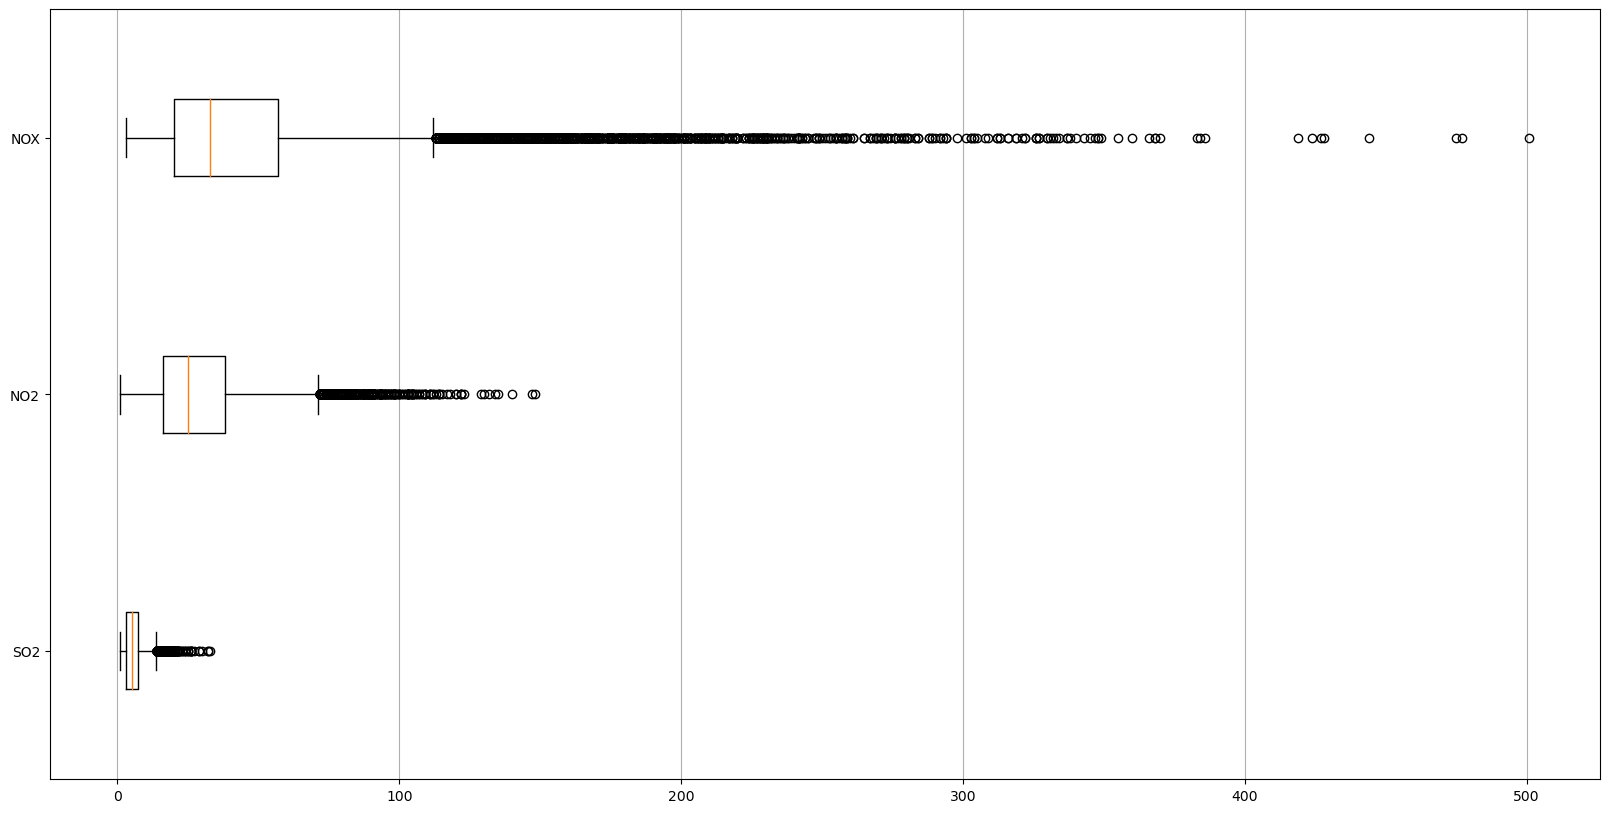

In [108]:
# Crear un gráfico de bigotes con Matplotlib para múltiples variables
plt.figure(figsize=(20, 10))  # Ajusta el tamaño del gráfico según tus preferencias

# Lista de variables que deseas trazar (por ejemplo, DV, HR y TEMP)
variables = [df.SO2, df.NO2, df.NOX]

# Etiquetas para las variables (opcional)
etiquetas = ['SO2', 'NO2', 'NOX']

# Crear el gráfico de bigotes para cada variable
plt.boxplot(variables, vert=False, labels=etiquetas)

# Mostrar el gráfico
plt.grid(axis='x')  # Agregar una cuadrícula horizontal
plt.show()

In [114]:
print(IQR)

estacion     36.000000
DV          149.250000
HR           30.000000
P             0.040000
PB            7.333333
RS          187.666667
RU            0.000000
TEMP         12.527273
VV            0.670000
BEN           0.225000
CH4           0.000000
CO            0.200000
EBE           0.300000
NMHC          0.090000
NO           10.000000
NO2          22.000000
NOX          37.000000
O3           35.119365
PM10         12.333333
PM25          6.500000
SO2           4.285714
TCH           1.385000
TOL           1.300000
dtype: float64


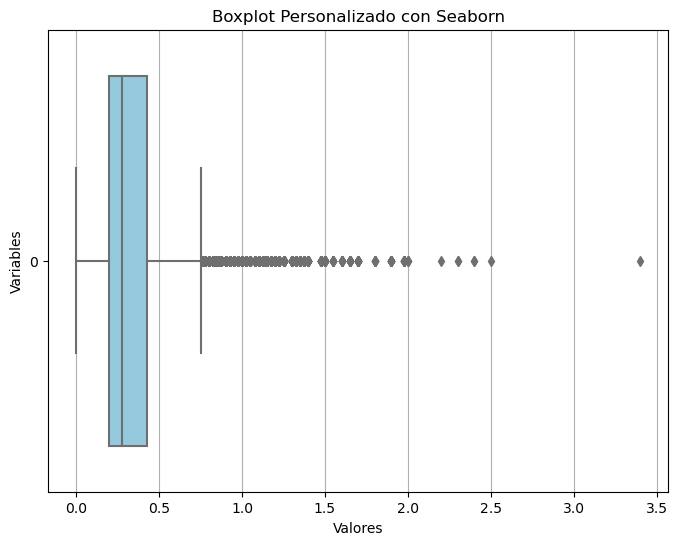

In [121]:
# Crear un gráfico de bigotes con Seaborn y especificar el color
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico según tus preferencias
sns.boxplot(data=df.BEN, orient='h', color='skyblue')  # Especifica el color aquí

# Personalizar el gráfico
plt.title('Boxplot Personalizado con Seaborn')
plt.xlabel('Valores')
plt.ylabel('Variables')

# Mostrar el gráfico
plt.grid(axis='x')  # Agregar una cuadrícula horizontal
plt.show()

## HISTOGRAMAS

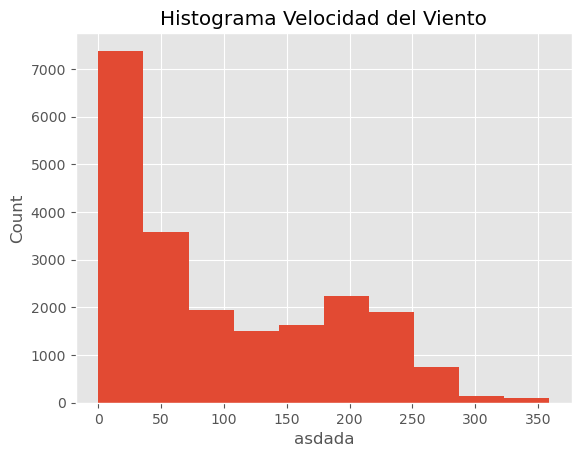

In [43]:
plt.hist(df.DV, bins=10)
plt.title("Histograma Velocidad del Viento")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

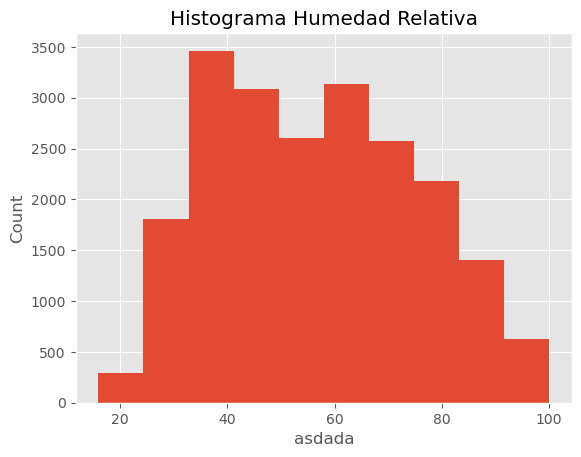

In [45]:
plt.hist(df.HR, bins=10)
plt.title("Histograma Humedad Relativa")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

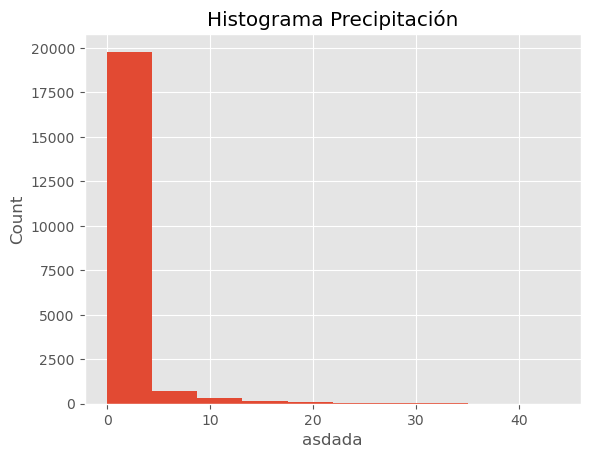

In [47]:
plt.hist(df.P, bins=10)
plt.title("Histograma Precipitación")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

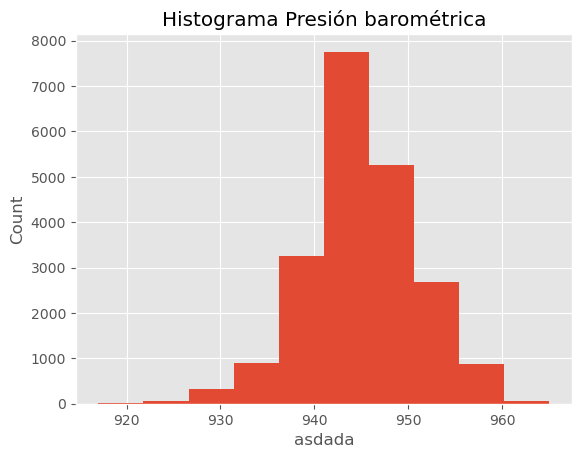

In [49]:
plt.hist(df.PB, bins=10)
plt.title("Histograma Presión barométrica")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

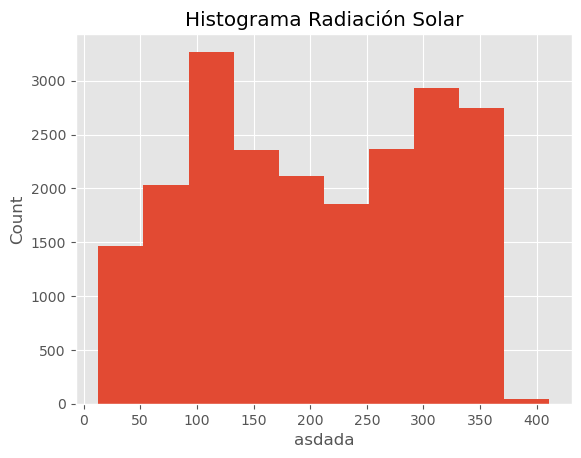

In [51]:
plt.hist(df.RS, bins=10)
plt.title("Histograma Radiación Solar")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

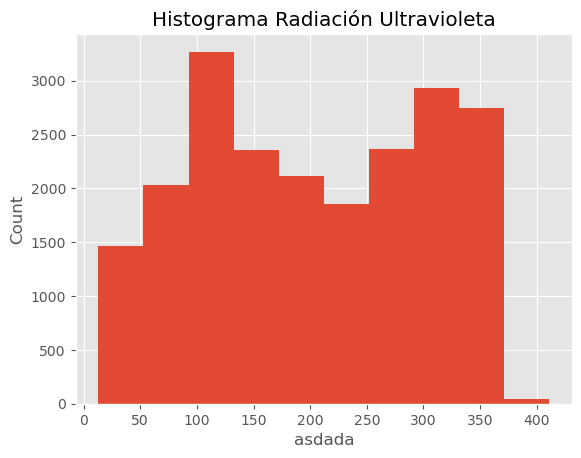

In [52]:
plt.hist(df.RS, bins=10)
plt.title("Histograma Radiación Ultravioleta")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

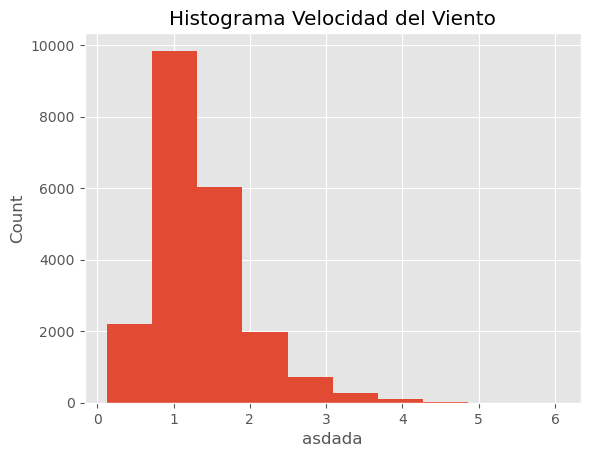

In [53]:
plt.hist(df.VV, bins=10)
plt.title("Histograma Velocidad del Viento")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

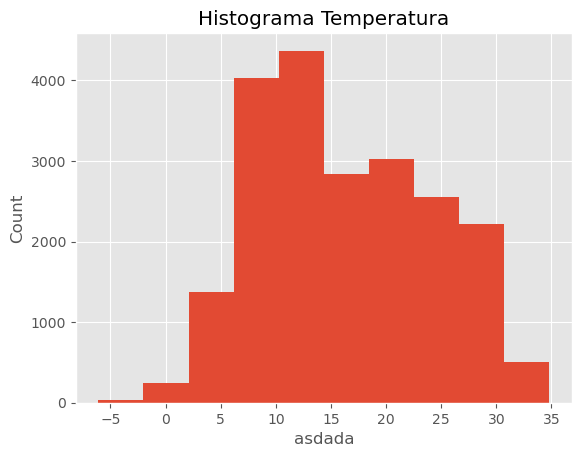

In [54]:
plt.hist(df.TEMP, bins=10)
plt.title("Histograma Temperatura")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

<AxesSubplot:xlabel='DV'>

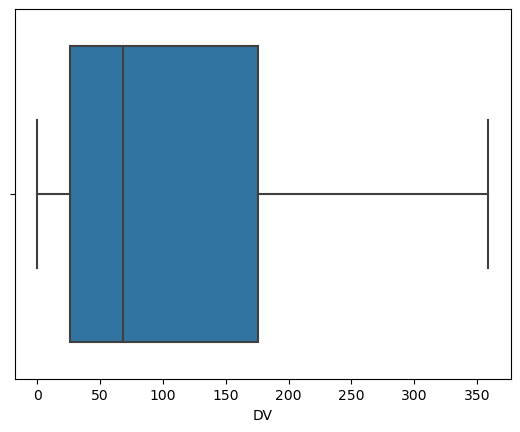

In [41]:
sns.boxplot(x=df.DV)

<AxesSubplot:xlabel='HR'>

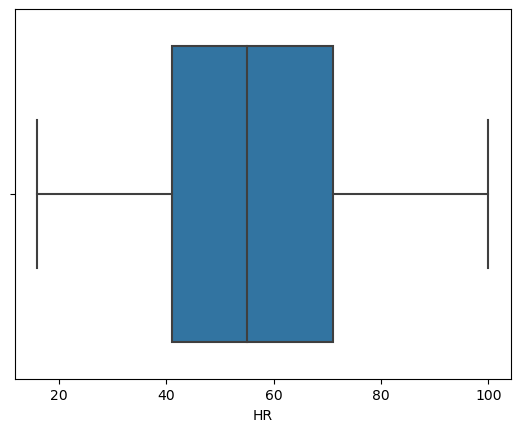

In [36]:
sns.boxplot(x=df.HR)

<AxesSubplot:xlabel='P'>

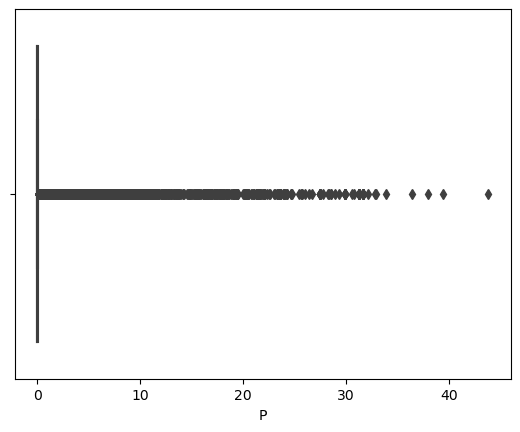

In [37]:
sns.boxplot(x=df.P)

<AxesSubplot:xlabel='PB'>

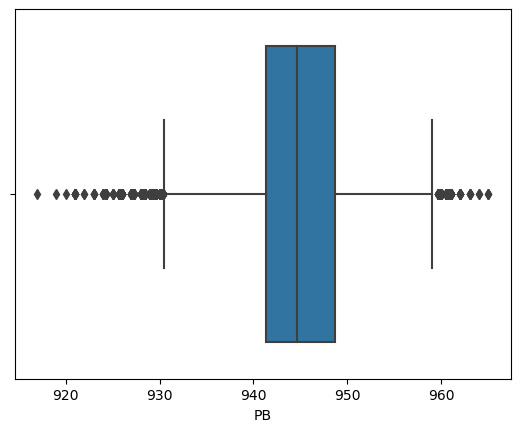

In [38]:
sns.boxplot(x=df.PB)

<AxesSubplot:xlabel='RS'>

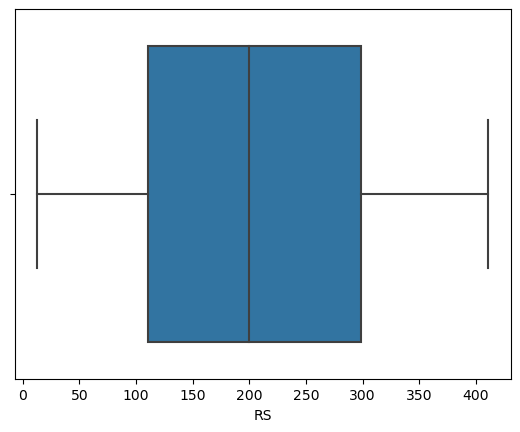

In [39]:
sns.boxplot(x=df.RS)

<AxesSubplot:xlabel='RU'>

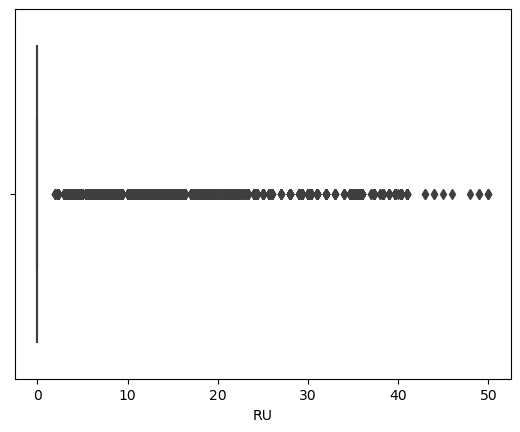

In [40]:
sns.boxplot(x=df.RU)

<AxesSubplot:xlabel='VV'>

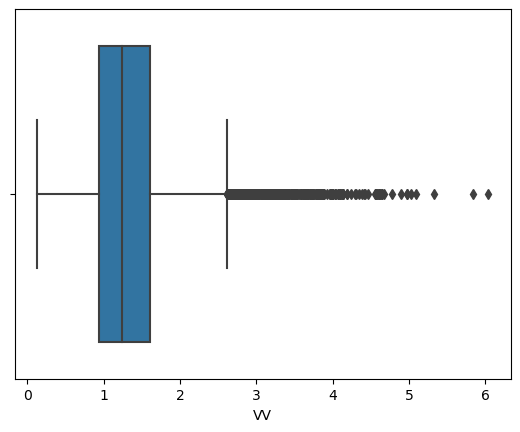

In [41]:
sns.boxplot(x=df.VV)

<AxesSubplot:xlabel='TEMP'>

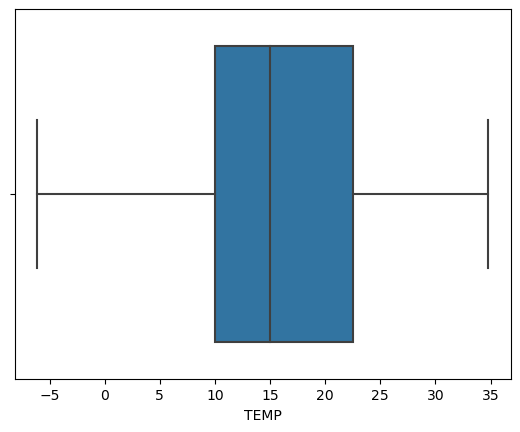

In [42]:
sns.boxplot(x=df.TEMP)

In [43]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

estacion     36.000000
DV          149.250000
HR           30.000000
P             0.040000
PB            7.333333
RS          187.666667
RU            0.000000
TEMP         12.527273
VV            0.670000
BEN           0.225000
CH4           0.000000
CO            0.200000
EBE           0.300000
NMHC          0.090000
NO           10.000000
NO2          22.000000
NOX          37.000000
O3           35.119365
PM10         12.333333
PM25          6.500000
SO2           4.285714
TCH           1.385000
TOL           1.300000
dtype: float64


In [58]:
df.describe()

,estacion,DV,HR,P,PB,RS,RU,TEMP,VV,BEN,...,NMHC,NO,NO2,NOX,O3,PM10,PM25,SO2,TCH,TOL
count,21187.000000,21187.000000,21187.00000,21187.000000,21187.000000,21187.000000,18307.000000,21187.000000,21187.000000,21187.000000,...,21187.000000,21187.000000,21187.000000,21187.000000,21187.000000,21187.000000,21187.000000,21187.000000,21187.000000,21187.000000
mean,34.755463,99.496897,56.51347,0.932221,944.935196,202.836417,1.554633,16.215445,1.351665,0.353018,...,0.045705,11.750233,28.888158,46.896168,52.758002,18.747336,9.852854,5.545123,0.620543,1.641856
std,18.151083,85.401593,18.72845,3.174759,5.895263,101.512191,5.739964,7.819105,0.597078,0.261544,...,0.060462,18.665905,17.579328,44.091985,22.891531,13.295410,5.816517,3.210400,0.706456,1.334360
min,4.000000,0.000000,16.00000,0.000000,917.000000,13.000000,0.000000,-6.100000,0.130000,0.000000,...,0.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.100000
25%,18.000000,26.000000,41.00000,0.000000,941.333333,110.666667,0.000000,9.972727,0.940000,0.200000,...,0.000000,2.000000,16.000000,20.000000,35.727778,11.000000,6.000000,3.000000,0.000000,0.775000
50%,36.000000,67.750000,55.00000,0.000000,944.666667,199.333333,0.000000,15.000000,1.237500,0.275000,...,0.000000,5.000000,25.000000,33.000000,54.757778,16.166667,8.750000,5.000000,0.000000,1.225000
75%,54.000000,175.250000,71.00000,0.040000,948.666667,298.333333,0.000000,22.500000,1.610000,0.425000,...,0.090000,12.000000,38.000000,57.000000,70.847143,23.333333,12.500000,7.285714,1.385000,2.075000
max,59.000000,359.000000,100.00000,43.800000,965.000000,411.000000,50.000000,34.800000,6.040000,3.400000,...,0.430000,231.000000,148.000000,501.000000,120.000000,432.000000,83.000000,33.000000,2.590000,35.300000


## HISTOGRAMAS CALIDAD DEL AIRE

In [126]:
df.describe()

,estacion,DV,HR,P,PB,RS,RU,TEMP,VV,BEN,...,NMHC,NO,NO2,NOX,O3,PM10,PM25,SO2,TCH,TOL
count,21187.000000,21187.000000,21187.00000,21187.000000,21187.000000,21187.000000,18307.000000,21187.000000,21187.000000,21187.000000,...,21187.000000,21187.000000,21187.000000,21187.000000,21187.000000,21187.000000,21187.000000,21187.000000,21187.000000,21187.000000
mean,34.755463,99.496897,56.51347,0.932221,944.935196,202.836417,1.554633,16.215445,1.351665,0.353018,...,0.045705,11.750233,28.888158,46.896168,52.758002,18.747336,9.852854,5.545123,0.620543,1.641856
std,18.151083,85.401593,18.72845,3.174759,5.895263,101.512191,5.739964,7.819105,0.597078,0.261544,...,0.060462,18.665905,17.579328,44.091985,22.891531,13.295410,5.816517,3.210400,0.706456,1.334360
min,4.000000,0.000000,16.00000,0.000000,917.000000,13.000000,0.000000,-6.100000,0.130000,0.000000,...,0.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.100000
25%,18.000000,26.000000,41.00000,0.000000,941.333333,110.666667,0.000000,9.972727,0.940000,0.200000,...,0.000000,2.000000,16.000000,20.000000,35.727778,11.000000,6.000000,3.000000,0.000000,0.775000
50%,36.000000,67.750000,55.00000,0.000000,944.666667,199.333333,0.000000,15.000000,1.237500,0.275000,...,0.000000,5.000000,25.000000,33.000000,54.757778,16.166667,8.750000,5.000000,0.000000,1.225000
75%,54.000000,175.250000,71.00000,0.040000,948.666667,298.333333,0.000000,22.500000,1.610000,0.425000,...,0.090000,12.000000,38.000000,57.000000,70.847143,23.333333,12.500000,7.285714,1.385000,2.075000
max,59.000000,359.000000,100.00000,43.800000,965.000000,411.000000,50.000000,34.800000,6.040000,3.400000,...,0.430000,231.000000,148.000000,501.000000,120.000000,432.000000,83.000000,33.000000,2.590000,35.300000


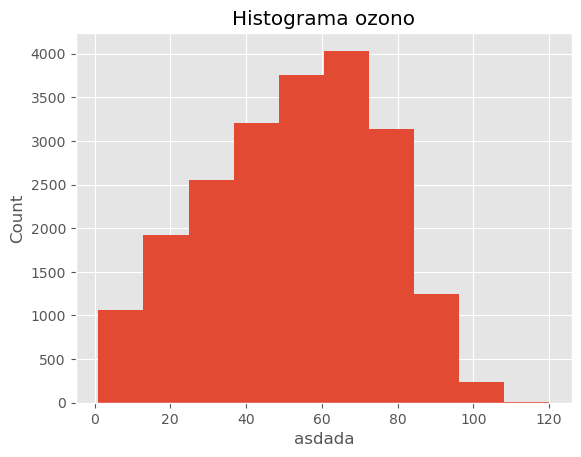

In [128]:
plt.hist(df.O3, bins=10)
plt.title("Histograma ozono")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

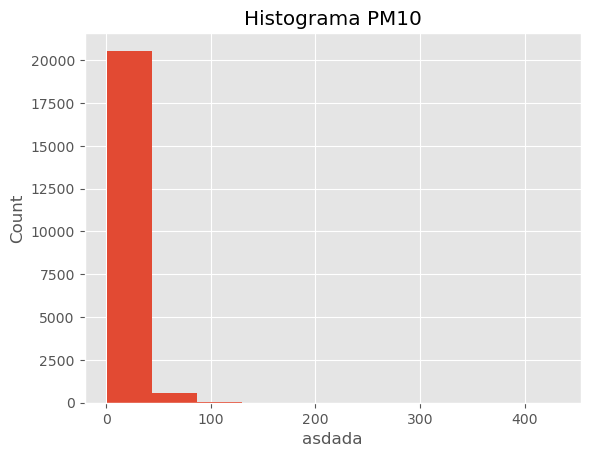

In [130]:
plt.hist(df.PM10, bins=10)
plt.title("Histograma PM10")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

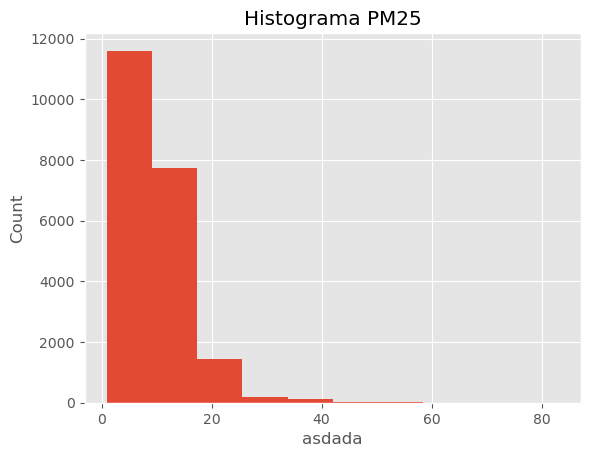

In [132]:
plt.hist(df.PM25, bins=10)
plt.title("Histograma PM25")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

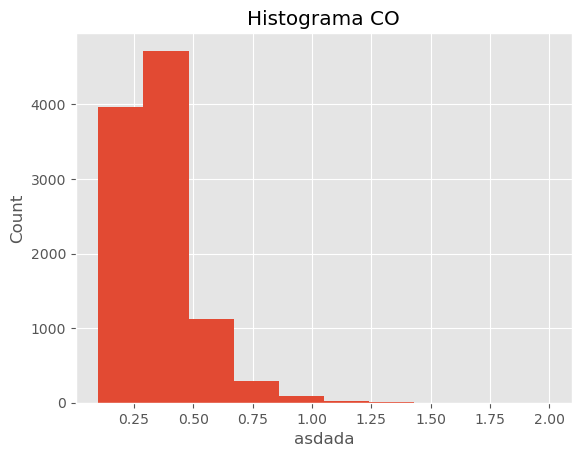

In [135]:
plt.hist(df.CO, bins=10)
plt.title("Histograma CO")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

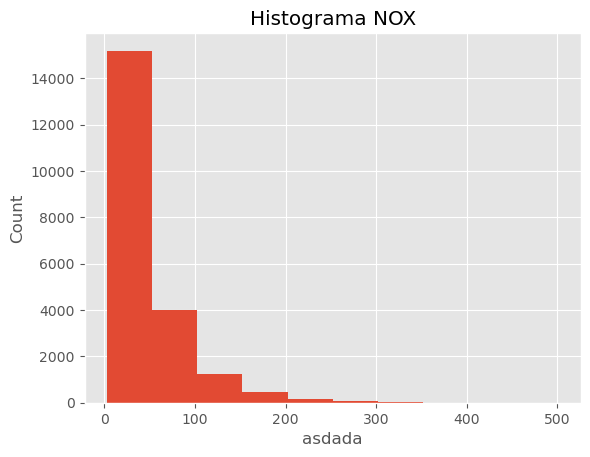

In [138]:
plt.hist(df.NOX, bins=10)
plt.title("Histograma NOX")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

## MATRIZ DE CORRELACIÓN

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

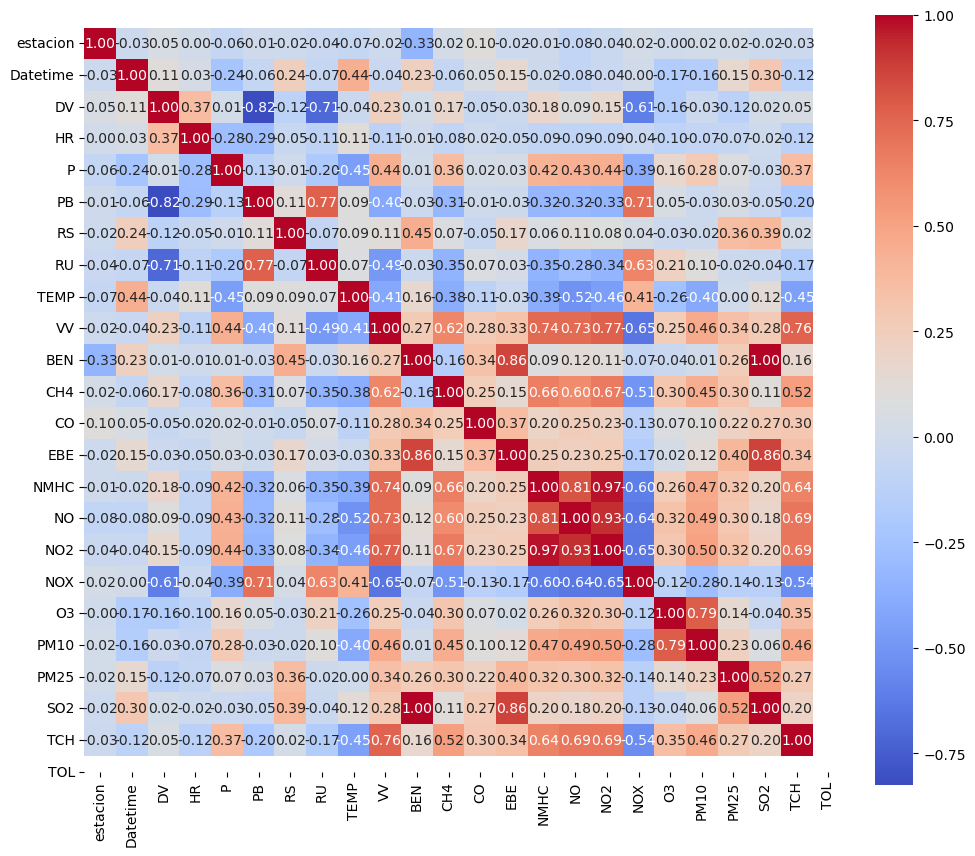

In [33]:
corrmat = df.corr()
plt.figure(figsize=(12, 10))
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10},  # Ajusta el tamaño de los valores anotados
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="coolwarm")

plt.savefig('matriz_correlacion.png', format='png', dpi=300, bbox_inches='tight')